<a href="https://colab.research.google.com/github/seungmei/QNS/blob/main/%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%B0%8D%EC%9C%BC%EB%A1%9C_%EB%B0%B0%EC%9A%B0%EB%8A%94_%EC%96%91%EC%9E%90%EC%BB%B4%ED%93%A8%ED%8C%85_6-3%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit qiskit-ibm-runtime pylatexenc qiskit_aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 75.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.9/363.9 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 9.0 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256

In [ ]:
import qiskit
import numpy as np
qiskit.version.get_version_info()

'2.0.2'

# 6. 양자 소인수 분해 알고리즘
- 양자 연산: 양자 위상 추정(Quantum Phase Estimation, QPE)을 활용한 모듈러 지수 함수의 주기 찾기
- 고전 연산: 양자 연산을 통해 찾은 주기를 사용하여 정수의 소인수 찾기

## 6.1 사이먼 알고리즘

### 6.1.1 사이먼 함수

### 6.1.2 사이먼 알고리즘을 구현하는 양자 회로

### 6.1.3 사이먼 오라클 회로의 구현

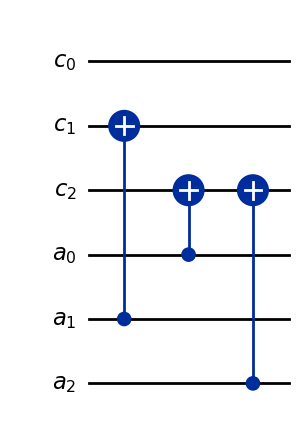

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister
# 3-qubit simon oracle with b = 101 을 정의하는 함수
def simon_oracle3(rc, ra):
    qc = QuantumCircuit(rc, ra)
    qc.cx(ra[1],rc[1])
    qc.cx(ra[0],rc[2])
    qc.cx(ra[2],rc[2])
    return qc

# 양자 레지스터와 고전 레지스터를 정의하고 이들을 사용하는 양자 회로를 초기화
n = 3
ra = QuantumRegister(n,'a')
rc = QuantumRegister(n,'c')
qc = QuantumCircuit(rc, ra)

# n=3 인 사이먼 오라클 회로를 양자 회로로 구현
oracle = simon_oracle3(rc, ra)
oracle.draw(output='mpl')

### 6.1.4 사이먼 회로의 구현

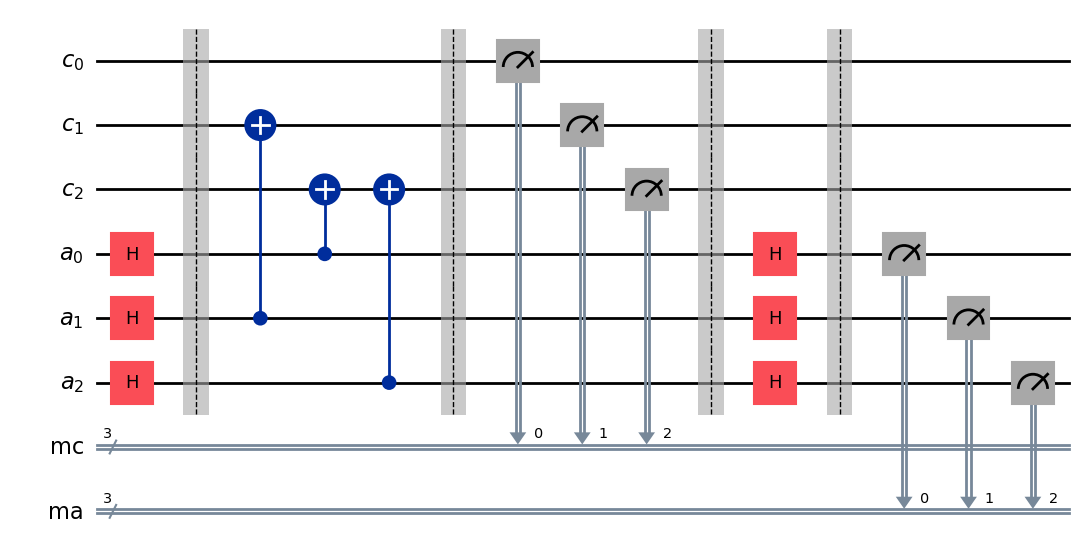

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
# 사이먼 회로의 구현
n = 3
ra = QuantumRegister(n,'a')
rc = QuantumRegister(n,'c')
rma = ClassicalRegister(n,'ma')
rmc = ClassicalRegister(n,'mc')
qc = QuantumCircuit(rc, ra, rmc, rma)

qc.h(ra)
qc.barrier()
qc.compose(simon_oracle3(rc,ra),range(2*n),inplace=True)
qc.barrier()
qc.measure(rc,rmc)
qc.barrier()
qc.h(ra)
qc.barrier()
qc.measure(ra,rma)
qc.draw(output='mpl',fold=-1)

In [ ]:
# AerSimulator 를 이용하여 circuit 회로를 측정한 결과를 출력
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import AerSimulator
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_circuit = pm.run(qc)
sampler = Sampler(mode=aer_sim)
job = sampler.run([isa_circuit], shots=n+20)
result = job.result()
count = result[0].data.ma.get_counts()
print(count)

{'000': 3, '111': 9, '010': 7, '101': 4}


b=[0, 0, 1, 0, 0]


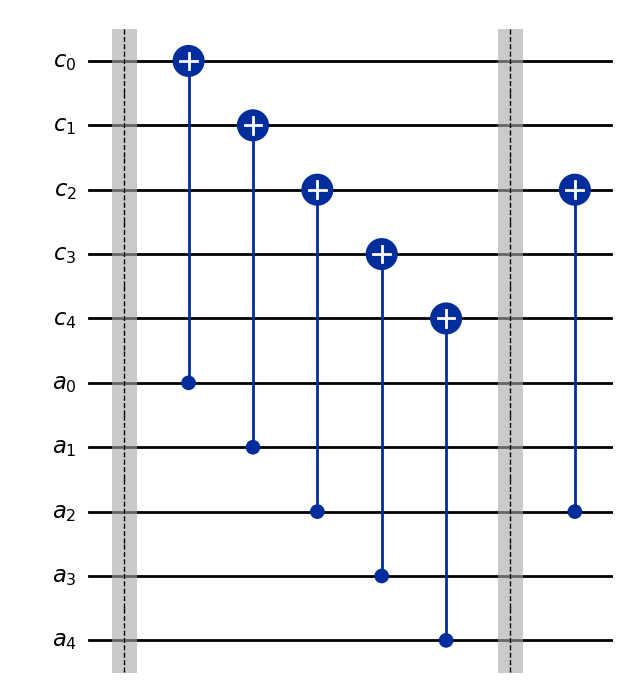

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
# n-큐비트 사이먼 오라클 함수를 구현하는 회로와 random b 를 반환하는 회로
def simon_oracle(rc, ra, n):
    qc = QuantumCircuit(rc, ra)
    np.random.seed()
    k = np.random.randint(1,n+1)
    b1 = np.random.permutation(n)[:k]
    b = []
    for i in range(n):
        if i in b1: b += [1]
        else :      b += [0] # 임의의 non-zero b 를 생성

    qc.barrier()
    for i in range(n): # c[i] ^= a[i]
        qc.cx(ra[i],rc[i])
    qc.barrier()
    for bi in b1:      # c^f(x^b) 를 c^f(x) 와 같게 만듦
        qc.cx(ra[n-1-b1[0]],rc[n-1-bi])

    return qc,b

# 양자 레지스터와 고전 레지스터를 정의하고 이들을 사용하는 양자 회로를 초기화
n = 5
ra = QuantumRegister(n,'a')
rc = QuantumRegister(n,'c')
rm = ClassicalRegister(n,'m')
qc = QuantumCircuit(rc, ra, rm)

# 사이먼 오라클 회로를 양자 회로로 구현
oracle, b = simon_oracle(rc,ra,n)
print(f"b={b}")
oracle.draw(output='mpl', fold=-1)

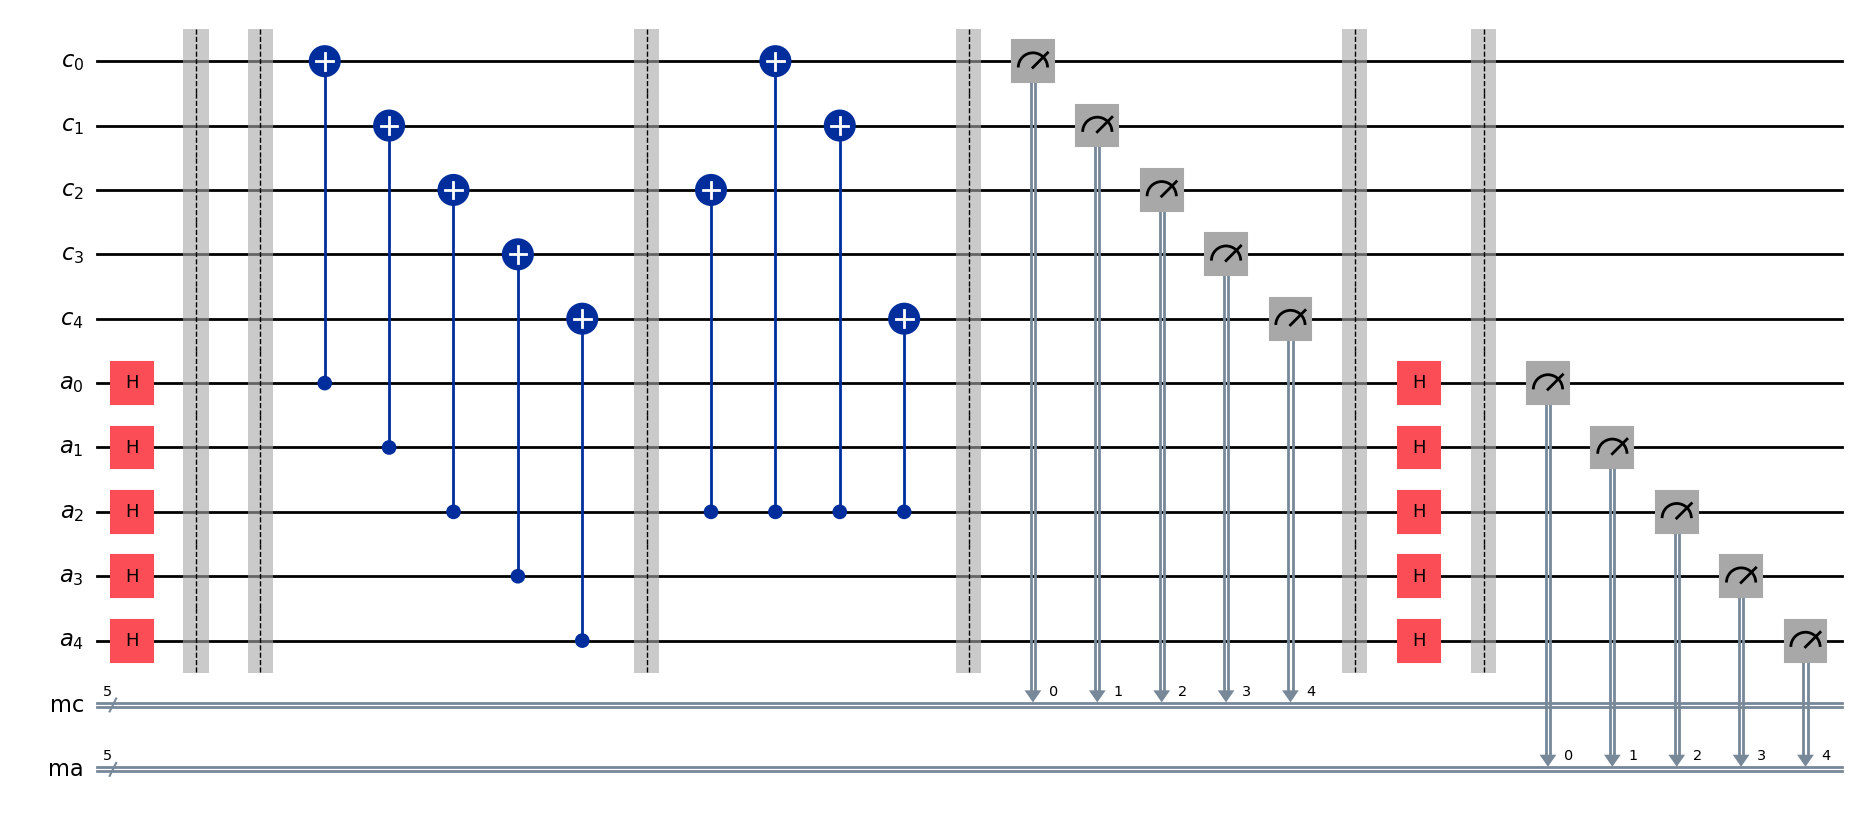

In [ ]:
# 사이먼 회로의 구현
n = 5
ra = QuantumRegister(n,'a')
rc = QuantumRegister(n,'c')
rma = ClassicalRegister(n,'ma')
rmc = ClassicalRegister(n,'mc')
qc = QuantumCircuit(rc, ra, rmc, rma)

qc.h(ra)
qc.barrier()
oracle, b = simon_oracle(rc,ra,n)
qc.compose(oracle,range(2*n),inplace=True)
qc.barrier()
qc.measure(rc,rmc)
qc.barrier()
qc.h(ra)
qc.barrier()
qc.measure(ra,rma)
qc.draw(output='mpl',fold=-1)

In [ ]:
# AerSimulator 를 이용하여 circuit 회로를 측정한 결과를 출력
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import AerSimulator
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_circuit = pm.run(qc)
sampler = Sampler(mode=aer_sim)
job = sampler.run([isa_circuit], shots=n+20)
result = job.result()
count = result[0].data.ma.get_counts()
print(count)

{'10111': 1, '11001': 2, '10100': 3, '11111': 1, '01011': 2, '01000': 4, '00110': 2, '00101': 1, '11010': 1, '11100': 2, '00011': 2, '01110': 1, '10001': 1, '00000': 2}


### 6.1.5 측정값으로부터 사이먼 주기를 찾는 알고리즘

In [ ]:
import numpy as np                                      #type: ignore
def rank_mod2(matrix):
    rows, cols = matrix.shape
    rank = 0
    for c in range(cols):
        # find the pivot row in column c
        for r in range(rank, rows):
            if matrix[r,c] != 0:
                # swap rows if needed
                if r != rank:
                    matrix[[rank,r]] = matrix[[r,rank]]

                # eliminate column below
                for k in range(rank+1, rows):
                    if matrix[k,c] == 1:
                        matrix[k] ^= matrix[rank]
                rank += 1
                break
    return rank

def indep(sys,e):
    sys.append(e)
    matrix = np.array(sys)
    n = len(sys)
    if rank_mod2(matrix) == n:
        return True
    else:
        sys.pop()
        return False

#  Gaussian Elimination in modulo-2
def ge_mod2(A):
    n = len(A)+1
    matrix = np.matrix(A)
    # Gaussian elimination
    for i in range(n-1):
        # Find the pivot row
        pivot = i
        while pivot < (n-1) and matrix[pivot,i] == 0:
            pivot += 1
        if pivot < (n-1):
            matrix[[i,pivot]] = matrix[[pivot,i]] # swap rows
            # Eliminate rows below
            for j in range(i + 1, n-1):
                if matrix[j, i] == 1:
                    matrix[j] ^= matrix[i]  # Row operation with XOR
    return matrix

#  Back Substitution in modulo-2
def back_substitution_mod2(matrix):
    # Back substitution to get a NON TRIVIAL solution
    _, n = matrix.shape
    x = -2*np.ones(n, dtype=int) # x[i] == -1 means x[i] is unknown yet
    x[-2] = x[-1] = -1                    # last row : 0....0011
    if matrix[n-2,-1] == 0 : x[-2] = 0    # last row : 0....0010
    elif matrix[n-2,-2] == 0 : x[-1] = 0  # last row : 0....0001
    for r in range(n-3, -1, -1):
        if matrix[:,r].sum() == 0 :
            x[r] = 1
        value = 0
        for c in range(r,n):
            if matrix[r,c] == 1 :
                if x[c] < 0 : break
        unknown = 0
        for j in range(c + 1, n):
            if matrix[r,j] == 1:
                if x[j] == -2: x[j] = -1
                if x[j] == -1:  unknown = 1 - unknown
                else :          value ^=  x[j]  # XOR to solve mod-2 equations
        if unknown == 1 : x[c] = -1
        else :
            if x[c] == -1:
                for j in range(r+1, n):
                    if x[j] == -1: x[j] = value
            x[c] = value
    # determine the unknown
    x1 = x.copy()
    for i in range(n):
        if x[i] == -1 : x1[i] = 1
    for r in range(n-1):
        v = 0
        for c in range(n):
            v ^= matrix[r,c] & x1[c]
        if v == 1 :
            for i in range(n):
                if x[i] == -1 : x[i] = 0
            return x
    return x1


def solve_simon(measured):
    sys_eq = []
    for z in measured.keys():
        n = len(z)
        if int(z) == 0 : continue  # skip all 0's
        eq = [int(zi) for zi in z] # binary string -> int list
        if len(sys_eq) == 0:
            sys_eq.append(eq)
            continue
        if (indep(sys_eq, eq)):
            if (len(sys_eq) == (n-1)):
                break
    print("The following z's are measured : ")
    print(np.array(sys_eq))
    matrix = ge_mod2(sys_eq)
    print("REF matrix:")
    print(matrix)
    b = back_substitution_mod2(matrix)
    return b

print("measured output : ", count)
b_simon = solve_simon(count)
print(f"The period of a function f(x)) with Simon Property is {b_simon}")

measured output :  {'10111': 1, '11001': 2, '10100': 3, '11111': 1, '01011': 2, '01000': 4, '00110': 2, '00101': 1, '11010': 1, '11100': 2, '00011': 2, '01110': 1, '10001': 1, '00000': 2}
The following z's are measured : 
[[1 0 1 1 1]
 [1 1 0 0 1]
 [1 0 1 0 0]
 [1 1 1 1 1]]
REF matrix:
[[1 0 1 1 1]
 [0 1 1 1 0]
 [0 0 1 1 0]
 [0 0 0 1 1]]
The period of a function f(x)) with Simon Property is [1 0 1 1 1]


## 6.2 양자 푸리에 변환 Quantum Fourier Transform
- 양자 컴퓨팅 분야에서 주기를 찾거나 위상을 추정하는 데 사용

### 6.2.1. 양자 푸리에 변환의 정의
- 양자상태는 **기저 상태들의 선형 결합**으로 표현
  |psi> =sigma x=0 to N-1 (psi(x))|x>
- QFT는 계산기저 |x>를 서로 다른 기저 상태들의 중첩 상태로 변환

### 6.2.2 양자 푸리에 변환 회로

### 6.2.3 3-큐비트 양자 푸리에 변환 회로의 구현 예

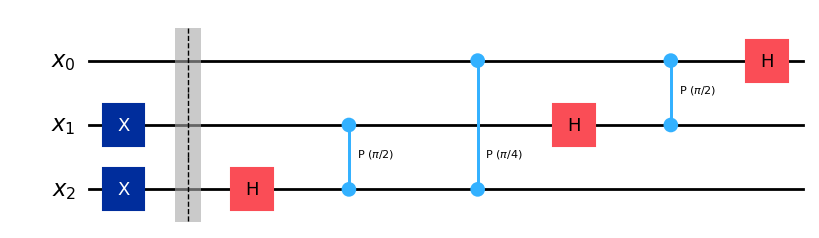

In [ ]:
import numpy as np
from qiskit import QuantumCircuit,QuantumRegister

# 3 qubit 양자 회로를 초기화한다.
qr = QuantumRegister(3,'x')
qc = QuantumCircuit(qr)

# 입력상태를 110 로 초기화한다.
qc.x(qr[1:3])
qc.barrier()

# 3 qubit QFT circuit
qc.h(2)
qc.cp(np.pi/2, 1, 2) # cR2
qc.cp(np.pi/4, 0, 2) # cR3
qc.h(1)
qc.cp(np.pi/2, 0, 1) # cR2
qc.h(0)

qc.draw(output='mpl')

In [ ]:
# 2. Add the classical output in the form of measurement of all qubits
qc_measured = qc.measure_all(inplace=False)

# 3. Execute using a simulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import AerSimulator
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_circuit = pm.run(qc_measured)
sampler = Sampler(mode=aer_sim)
job = sampler.run([isa_circuit], shots=1000)
result = job.result()
count = result[0].data.meas.get_counts()
print(count)

{'001': 112, '100': 122, '111': 127, '011': 145, '110': 130, '010': 120, '000': 124, '101': 120}


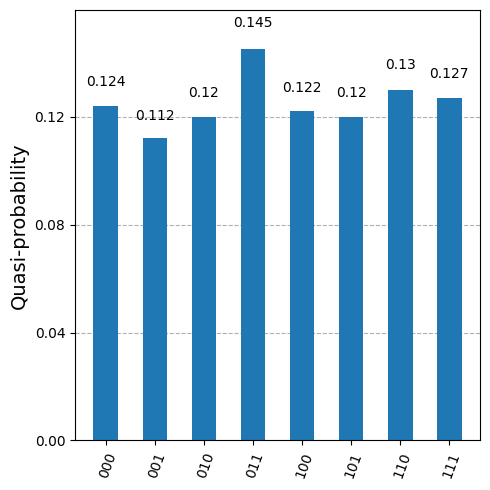

In [ ]:
from qiskit.visualization import plot_distribution
plot_distribution(count, figsize=(5, 5))

In [ ]:
# 회로의 양자 상태를 상태 벡터로 출력
from qiskit.quantum_info import Statevector
sv = Statevector(qc)
sv.draw(output = 'latex')

<IPython.core.display.Latex object>

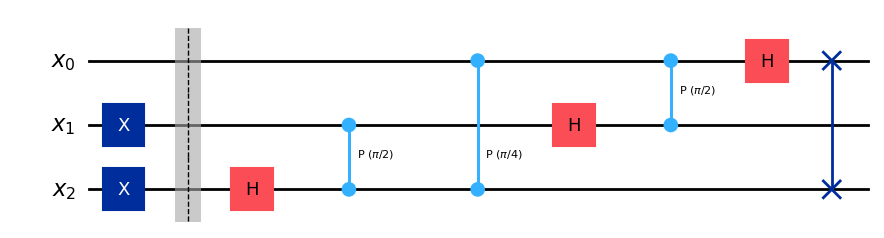

In [ ]:
import numpy as np
from qiskit import QuantumCircuit,QuantumRegister

# 3 qubit 양자 회로를 초기화한다.
qr = QuantumRegister(3,'x')
qc = QuantumCircuit(qr)

# 입력상태를 0b110 로 초기화한다.
qc.x(qr[1:3])
qc.barrier()

# 3 qubit QFT circuit
qc.h(2)
qc.cp(np.pi/2, 1, 2) # cR2
qc.cp(np.pi/4, 0, 2) # cR3
qc.h(1)
qc.cp(np.pi/2, 0, 1) # cR2
qc.h(0)
qc.swap(0,2) # 큐비트 순서를 역순으로 바꾸기
qc.draw(output='mpl')

In [ ]:
# 회로의 양자 상태를 상태 벡터로 출력
from qiskit.quantum_info import Statevector
sv = Statevector(qc)
sv.draw(output = 'latex')

<IPython.core.display.Latex object>

### 6.2.4 QFT 클래스와 역 푸리에 변환

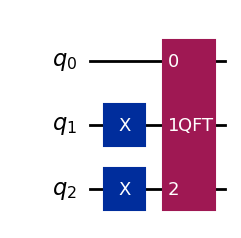

In [ ]:
from qiskit.circuit.library import QFT

# 3 qubit 양자 회로를 초기화한다.
qc = QuantumCircuit(3)

# 입력상태를 0b110 로 초기화한다.
qc.x([1,2])
qft_c = QFT(3)
qc.compose(qft_c, range(3), inplace=True)

qc.draw(output='mpl')

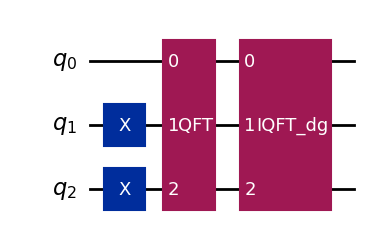

In [ ]:
from qiskit.circuit.library import QFT

# 3 qubit 양자 회로를 초기화한다.
qc = QuantumCircuit(3)

# 입력상태를 0b110 로 초기화한다.
qc.x([1,2])

qc.compose(QFT(3), range(3), inplace=True)
qc.compose(QFT(3, inverse=True), range(3), inplace=True)
qc.draw(output='mpl')

어떤 양자 상태에 QFT를 적용하여 그 QFT 출력 상태에 대해 다시 IQFT를 적용하면 원래 상태가 복원되어야 한다.
이를 |110> 에 대해 확인해보자. 양자 회로를 시뮬레이터에 넣어서 실행하면 100%의 확률로 측정값 110이 측정된다.

In [ ]:
# 2. Add the classical output in the form of measurement of all qubits
qc_measured = qc.measure_all(inplace=False)

# 3. Execute using a simulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import AerSimulator
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_circuit = pm.run(qc_measured)
sampler = Sampler(mode=aer_sim)
job = sampler.run([isa_circuit], shots=1000)
result = job.result()
count = result[0].data.meas.get_counts()
print(count)

{'110': 1000}


## 6.3 양자 위상 추정 Quantum Phase Estimation
양자 위상 추정
1. 고유상태 준비:U의 고유벡터 psi>
2. 제어 연산과 QFT: 제어-U 게이트를 구현하여 반복적으로 적용하면서 위상 정보 기록, 마지막으로 QFT를 통해 위상 정보를 해독할 수도록 변환
3. 위상 정보 추정: QFT 결과로부터 얻어진 정보를 통해 고유값 lambda = e**2*pi*i*theta의 theta를 결정

### 6.3.1 양자 위상 추정 회로
-x 레지스터:t개의 평가 큐비트 evaluation qubits로 구성된 레지스터로 위상 값 측정 |+>**tensor product t
-y 레지스터: n-큐비트 레지스터. 위상을 추정하려는 U 게이트 적용되는 대상. 입력상태는 U의 고유벡터인 |psi_theta>

### 6.3.2 양자 위상 추정 회로의 코드 구현

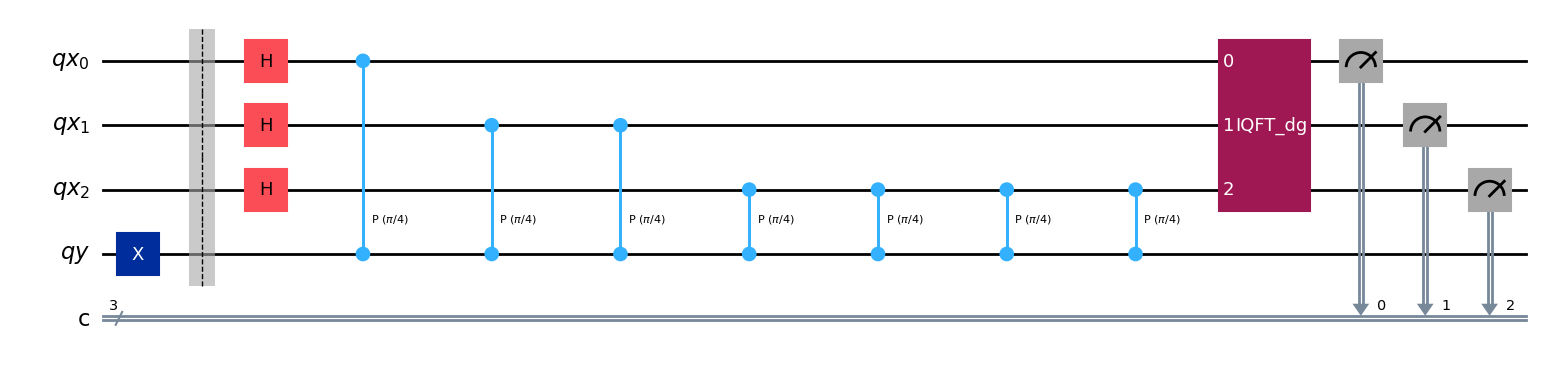

In [ ]:
# phase estimation circuit
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import QFT

t = 3
n = 1
qx = QuantumRegister(t,'qx') # t개의 평가 큐비트 evaluation qubits. 위상값 측정하는데 사용. 입력상태를 |+> 로 준비 phase estimation circuit
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import QFT

t = 3
n = 1
qx = QuantumRegister(t,'qx') # t개의 평가 큐비트 evaluation qubits. 위상값 측정하는데 사용. 입력상태를 |+> 로 준비
qy = QuantumRegister(n,'qy') # n-qubit 레지스터. 위상을 추정하려는 U 게이트가 적용되는 대상. 입력상태를 |psi_theta> 로 준비
c = ClassicalRegister(t,'c')
qpe = QuantumCircuit(qx, qy, c)

phase = 1/8
qpe.x(qy) # eigenstate |1> # y 레지스터는 |1>로 초기화
qpe.barrier()
qpe.h(qx) # x 레지스터의 입력상태는 |x>
Un = 1
for qx_i in range(t):
    for i in range(Un):
        qpe.cp(2*np.pi*phase, qx[qx_i], qy); # controlled-P #.cp()를 호출하여 위상편이인자를 pi/4로 설정
    Un *= 2

qpe.compose(QFT(t, inverse=True), qx[:], inplace=True)
qpe.measure(qx,c)
qpe.draw(fold=-1, output='mpl')
# 100% 의 확률로 001이 측정됨
# theta = 001/2**3 = 1/8 임을 확인

In [ ]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import AerSimulator
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_circuit = pm.run(qpe)
sampler = Sampler(mode=aer_sim)
job = sampler.run([isa_circuit], shots=1)
result = job.result()
count = result[0].data.c.get_counts()
print(count)

{'001': 1}


### 6.3.3 양자 위상 추정의 출력 분포
연산자 U의 고윳값이 위상 theta 가 x*2**-t 형태가 아닌 경우에는, 즉 theta를 이진표현으로 정확하게 나타낼 수 없는 경우에는, QPE 알고리즘을 통해 얻는 추정값은 평가 큐비트의 수에 따라 결정되는 확률 분포를 따르게 된다.

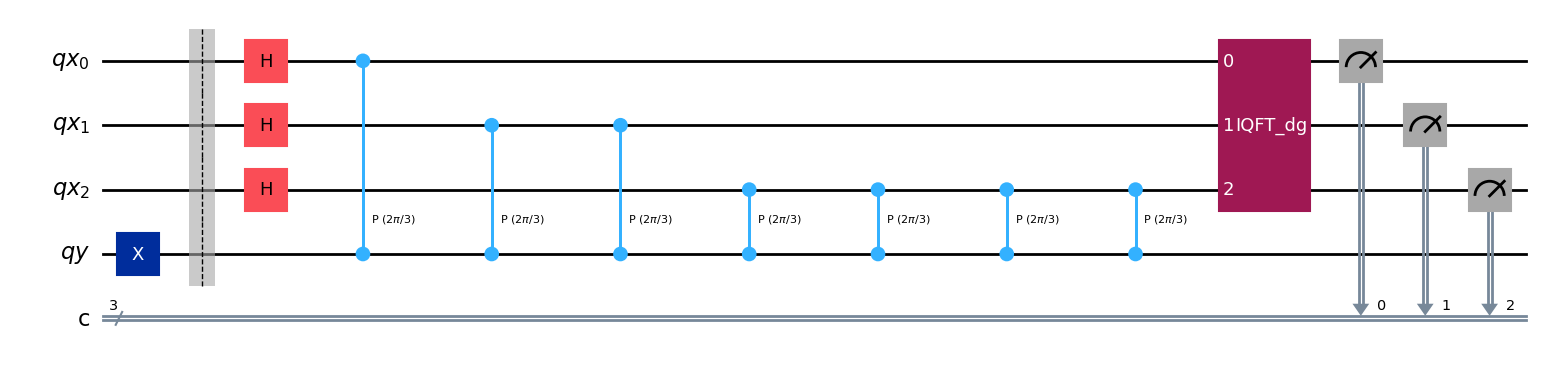

In [ ]:
# phase estimation circuit
# P(2*pi/3) 게이트에 대한 QPE 코드
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import QFT

t = 3
n = 1
qx = QuantumRegister(t,'qx')
qy = QuantumRegister(n,'qy')
c = ClassicalRegister(t,'c')
qpe = QuantumCircuit(qx, qy, c)

phase = 1/3
qpe.x(qy) # eigenstate |1>
qpe.barrier()
qpe.h(qx)
Un = 1
for qx_i in range(t):
    for i in range(Un):
        qpe.cp(2*np.pi*phase, qx[qx_i], qy); # controlled-P
    Un *= 2

qpe.compose(QFT(t, inverse=True), qx[:], inplace=True)
qpe.measure(qx,c)
qpe.draw(fold=-1, output='mpl')

{'011': 6861, '100': 479, '000': 156, '010': 1762, '001': 312, '111': 133, '110': 118, '101': 179}


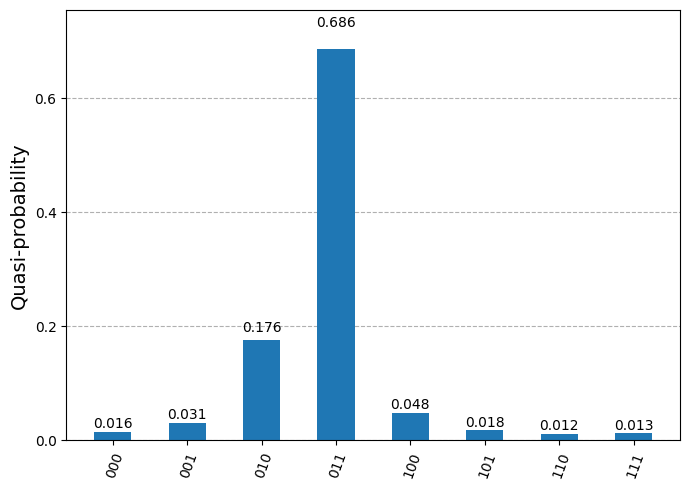

In [ ]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import AerSimulator
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_circuit = pm.run(qpe)
sampler = Sampler(mode=aer_sim)
job = sampler.run([isa_circuit], shots=10000)
result = job.result()
count = result[0].data.c.get_counts()
print(count)

from qiskit.visualization import plot_distribution
plot_distribution(count)
# theta의 참 값 1/3에 가까운 011(위상추정값 3/8), 010(위상추정값 2/8)이 가장 높은 빈도로 측정됨.

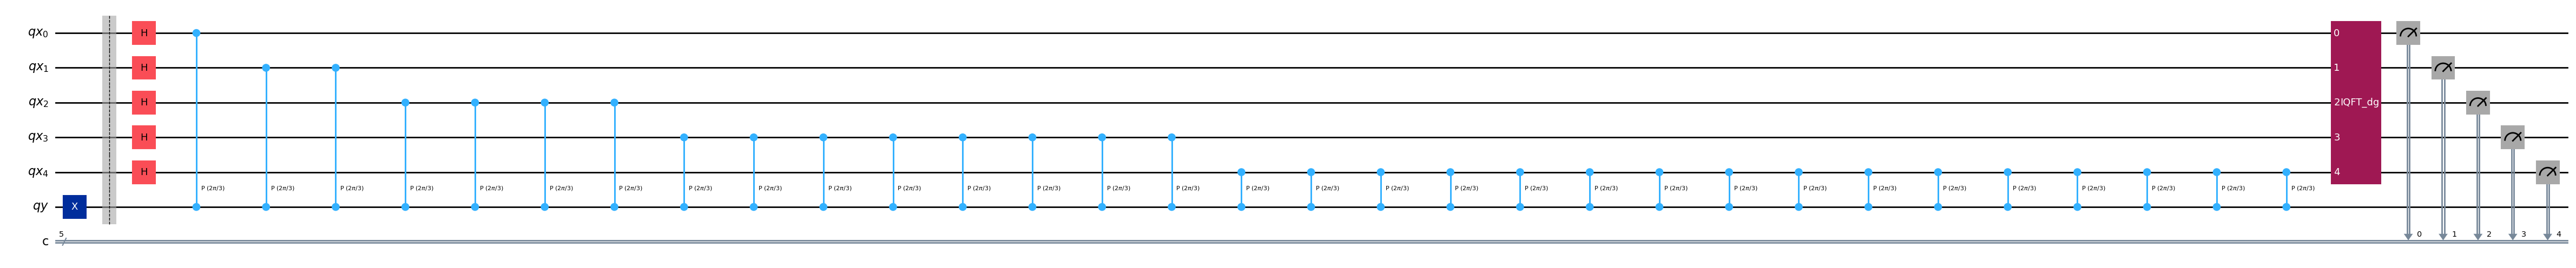

In [ ]:
# phase estimation circuit
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import QFT

t = 5
n = 1
qx = QuantumRegister(t,'qx')
qy = QuantumRegister(n,'qy')
c = ClassicalRegister(t,'c')
qpe = QuantumCircuit(qx, qy, c)

phase = 1/3
qpe.x(qy) # eigenstate |1>
qpe.barrier()
qpe.h(qx)
Un = 1
for qx_i in range(t):
    for i in range(Un):
        qpe.cp(2*np.pi*phase, qx[qx_i], qy); # controlled-P
    Un *= 2

qpe.compose(QFT(t, inverse=True), qx[:], inplace=True)
qpe.measure(qx,c)
qpe.draw(fold=-1, output='mpl')

{'01001': 268, '01011': 6894, '01111': 36, '01000': 114, '01010': 1712, '01100': 416, '01101': 118, '11011': 9, '11111': 11, '00010': 10, '11000': 8, '10001': 21, '00110': 47, '11110': 6, '10011': 19, '00111': 66, '01110': 68, '00100': 9, '10110': 10, '10000': 44, '11101': 5, '10010': 15, '10100': 14, '00101': 18, '10111': 6, '11010': 4, '11100': 3, '11001': 6, '10101': 8, '00000': 12, '00001': 14, '00011': 9}


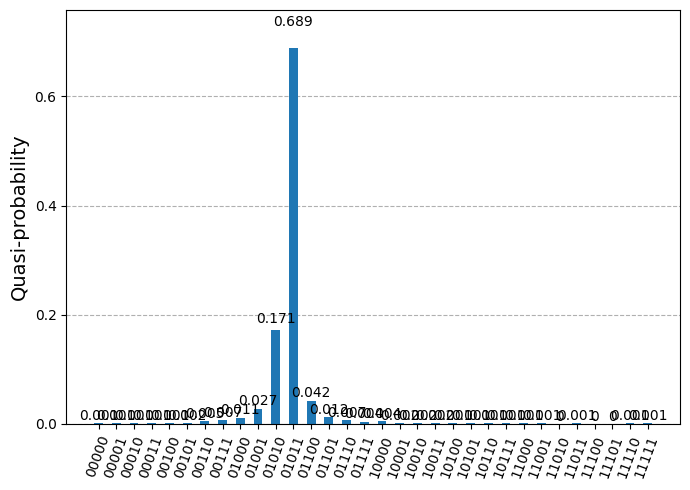

In [ ]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import AerSimulator
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_circuit = pm.run(qpe)
sampler = Sampler(mode=aer_sim)
job = sampler.run([isa_circuit], shots=10000)
result = job.result()
count = result[0].data.c.get_counts()
print(count)

from qiskit.visualization import plot_distribution
plot_distribution(count)
# theta = 1/3 에 가장 가까운 01011, 01010 의 추정빈도가 높은 편으로 나타내ㅏㄴ다.

- 위상 theta 를 이진 표현으로 정확하게 나타낼 수 없는 경우에는 QPE로부터 추정된 위상 값이 평가 큐비트 수에 따라 결정되는 확률분포를 따름, 평가 큐비트 수 ↑ -> 추정값의 정확도 ↑
- 위상 theta 가 x/2**t 로 표현할 수 없는 경우, 평가 큐비트의 개수 t에 따라 위상 추정값의 확률 분포가 이론적으로 예측됨.

### 6.3.4 n-큐비트 게이트의 양자 위상 추정 회로
- 멀티-큐비트 게이트의 위상 추정 회로를 구현.
- 2-qubit 게이트 U를 고려.

In [ ]:
U = [[np.exp(2j*np.pi/8), 0, 0, 0],
        [0, np.exp(2j*np.pi*2/8), 0, 0],
        [0, 0, np.exp(2j*np.pi*3/8), 0],
        [0, 0, 0, np.exp(2j*np.pi*4/8)]]

from qiskit.visualization import array_to_latex
array_to_latex(U, prefix="U = ",max_size=16)

<IPython.core.display.Latex object>

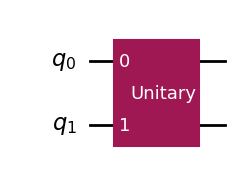

In [ ]:
Ucircuit = QuantumCircuit(2)
Ucircuit.unitary(U, [0,1]) # unitary 연산 U를 구현하는 양자 회로 Ucircuit 생성
Ucircuit.draw(output='mpl')

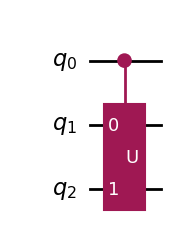

In [ ]:
# Ucircuit 을 Gate 객체 Ugate 로 만들고 이름을 "U"로 정한다.
Ugate = Ucircuit.to_gate() # 하나의 양자 게이트 객체로 변환
Ugate.name = "U"

# 제어-U 게이트 cUgate 를 만들고 양자 회로 qc 에 연결한다.
cUgate = Ugate.control(1) # 제어 큐비트 추가
qc = QuantumCircuit(3)
qc.append(cUgate, [0,1,2]) # q0 is control
qc.draw(output='mpl')

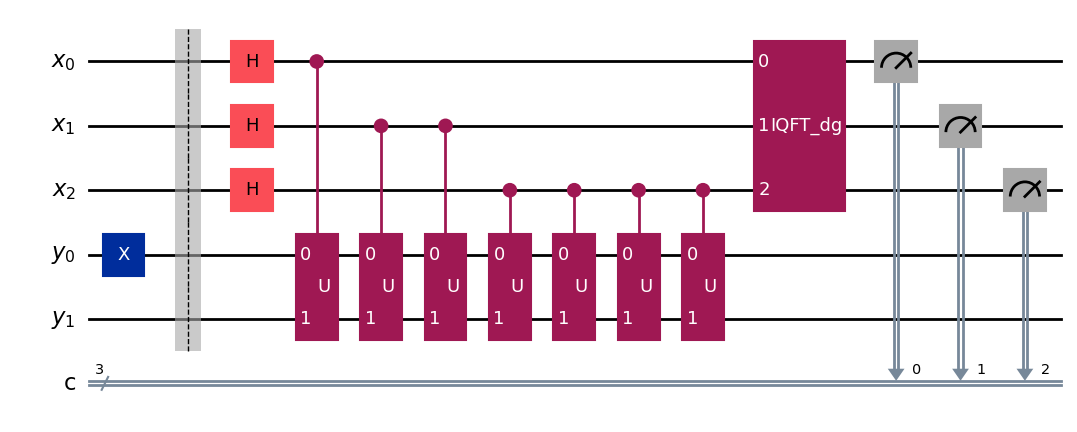

In [ ]:
# 2-qubit U gate 에 대한 위상추정(QPE) 회로
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import QFT

t = 3
n = 2
qx = QuantumRegister(t,'x')
qy = QuantumRegister(n,'y')
c = ClassicalRegister(t,'c')
qpe = QuantumCircuit(qx, qy, c)

qpe.x(qy[0]) # 고유벡터 |01>
qpe.barrier()
qpe.h(qx)
Un = 1
for qx_i in range(t):
    for i in range(Un):
        qpe.append(cUgate, [qx[qx_i], qy[0], qy[1]]); # controlled-U
    Un *= 2

qpe.compose(QFT(t, inverse=True), qx[:], inplace=True)
qpe.measure(qx,c)
qpe.draw(fold=-1, output='mpl')

### 6.3.5 PhaseEstimation클래스
- QPE 회로는 qiskit패키지에 qiskit.circuit.library.PhaseEstimation 클래스로 구현되어 있음.
- class qiskit.circuit.library.PhaseEstimation(num_evaluation_qubits, unitary, iqft=None, name='QPE')

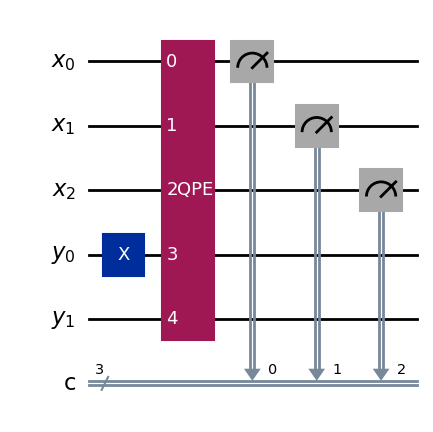

In [ ]:
# phase estimation using PhaseEstimation class with QFT
from qiskit.circuit.library import QFT,PhaseEstimation                   # type: ignore
t = 3
n = 2
qx = QuantumRegister(t,'x')
qy = QuantumRegister(n,'y')
c = ClassicalRegister(t,'c')
qpe = QuantumCircuit(qx, qy, c)
qpe.x(qy[0]) #|01> # input state = |1>
qpe.append(PhaseEstimation(t,Ugate,QFT(t,inverse=True)),qx[:]+qy[:])
qpe.measure(qx,c)
qpe.draw(output='mpl',fold=-1)

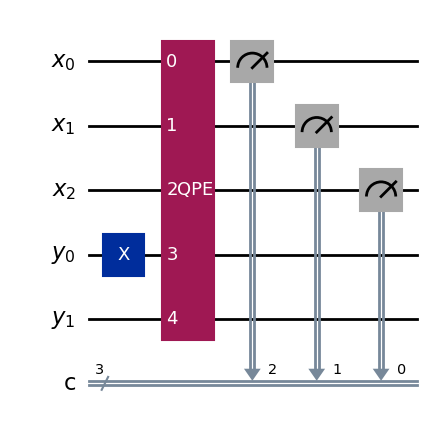

In [ ]:
# phase estimation using PhaseEstimation class with default QFT
# PhaseEstimation 클래스 생성 시, 세번째 인자인 IQFT 회로를 지정하지 않으면 디폴트 IQFT 회로가 적용된다. 디폴트 IQFT 회로에서는 평가 큐비트의 순서가 SWAP 되어 있지 않다.
# 세번째 인자 없이 객체를 생성하면, 평가 큐비트의 순서가 역순으로 되었기 때문에, 평가 큐비트를 측정하고 그 결과를 고전 레지스터에 할당하는 함수 qpe.measure(qx, reversed(c))를 호출할 때 reversed(c)를 인자로 사용
from qiskit.circuit.library import QFT,PhaseEstimation            # type: ignore
t = 3
n = 2
qx = QuantumRegister(t,'x')
qy = QuantumRegister(n,'y')
c = ClassicalRegister(t,'c')
qpe = QuantumCircuit(qx, qy, c)
qpe.x(qy[0]) # input state = |1>
qpe.append(PhaseEstimation(t,Ugate),qx[:]+qy[:])
qpe.measure(qx,reversed(c))
qpe.draw(output='mpl',fold=-1)

## 6.4 쇼어 알고리즘